In [54]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
data = fetch_openml("adult", version=2, as_frame=True)

In [55]:
df=data.data
df["income"]=data.target
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [56]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [57]:
df["workclass"].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [58]:
df=df.drop(['workclass', 'occupation','native-country'],axis=1)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   fnlwgt          48842 non-null  int64   
 2   education       48842 non-null  category
 3   education-num   48842 non-null  int64   
 4   marital-status  48842 non-null  category
 5   relationship    48842 non-null  category
 6   race            48842 non-null  category
 7   sex             48842 non-null  category
 8   capital-gain    48842 non-null  int64   
 9   capital-loss    48842 non-null  int64   
 10  hours-per-week  48842 non-null  int64   
 11  income          48842 non-null  category
dtypes: category(6), int64(6)
memory usage: 2.5 MB


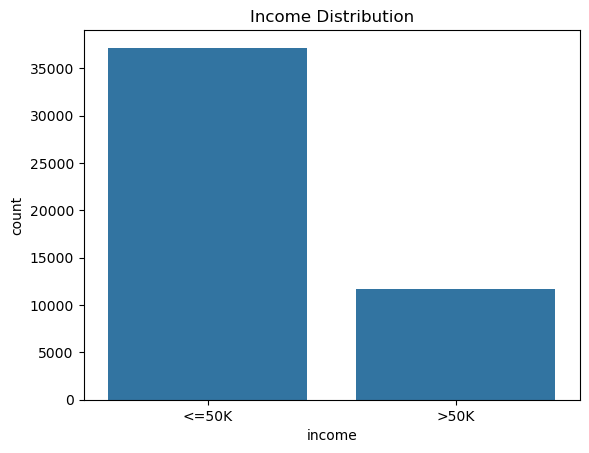

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=df)
plt.title('Income Distribution')
plt.show()


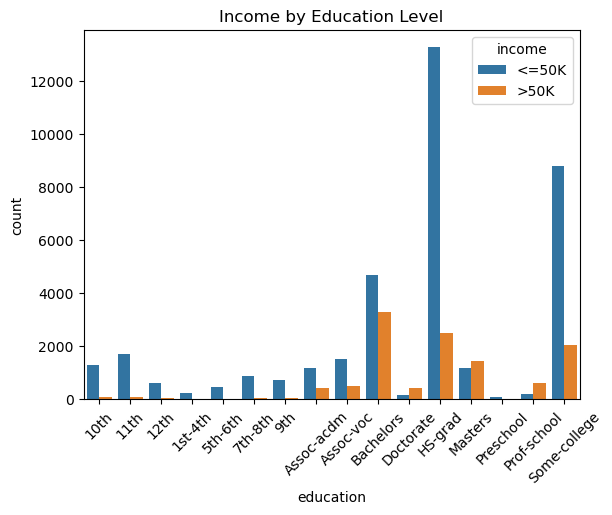

In [61]:
sns.countplot(x='education', hue='income', data=df)
plt.title('Income by Education Level')
plt.xticks(rotation=45)
plt.show()


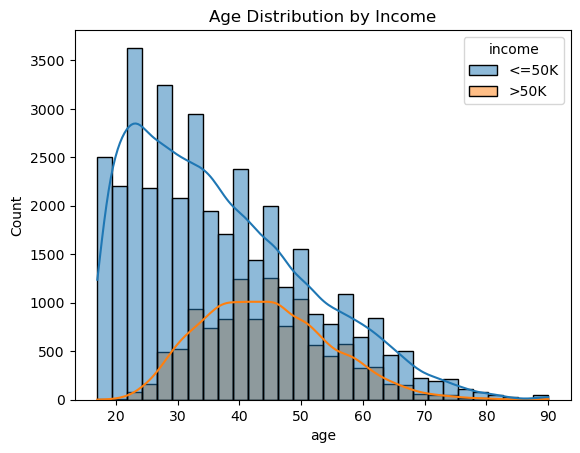

In [62]:
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True)
plt.title('Age Distribution by Income')
plt.show()


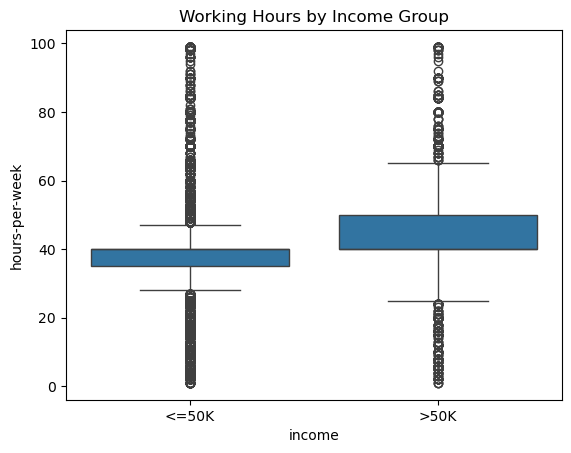

In [63]:
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Working Hours by Income Group')
plt.show()


In [64]:
df.isnull().sum()

age               0
fnlwgt            0
education         0
education-num     0
marital-status    0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
income            0
dtype: int64

In [65]:
df.duplicated().sum()

202

In [66]:
df.drop_duplicates(inplace=True)


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48640 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48640 non-null  int64   
 1   fnlwgt          48640 non-null  int64   
 2   education       48640 non-null  category
 3   education-num   48640 non-null  int64   
 4   marital-status  48640 non-null  category
 5   relationship    48640 non-null  category
 6   race            48640 non-null  category
 7   sex             48640 non-null  category
 8   capital-gain    48640 non-null  int64   
 9   capital-loss    48640 non-null  int64   
 10  hours-per-week  48640 non-null  int64   
 11  income          48640 non-null  category
dtypes: category(6), int64(6)
memory usage: 2.9 MB


In [68]:
# Columns of  category type
cats_cols=df.columns[df.dtypes=='category']
cats_cols

Index(['education', 'marital-status', 'relationship', 'race', 'sex', 'income'], dtype='object')

In [69]:
df["education"].value_counts()

education
HS-grad         15704
Some-college    10827
Bachelors        7979
Masters          2652
Assoc-voc        2059
11th             1810
Assoc-acdm       1601
10th             1386
7th-8th           954
Prof-school       834
9th               756
12th              654
Doctorate         594
5th-6th           505
1st-4th           245
Preschool          80
Name: count, dtype: int64

In [70]:
df['education'] = df['education'].str.strip()
df['education']=df['education'].map({'Preschool':0,'1st-4th':1,'5th-6th':2,'7th-8th':3,'9th':4,'10th':5,'11th':6,'12th':7,
                                     'HS-grad':8,'Some-college':9,'Assoc-voc':10,'Assoc-acdm':11,'Bachelors':12,
                                     'Masters':13,'Prof-school':14,'Doctorate':15})

In [71]:
df['education'].value_counts()

education
8     15704
9     10827
12     7979
13     2652
10     2059
6      1810
11     1601
5      1386
3       954
14      834
4       756
7       654
15      594
2       505
1       245
0        80
Name: count, dtype: int64

In [72]:
df["marital-status"].value_counts()

marital-status
Married-civ-spouse       22289
Never-married            16013
Divorced                  6627
Separated                 1529
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64

In [73]:
df["relationship"].value_counts()

relationship
Husband           19628
Not-in-family     12525
Own-child          7532
Unmarried          5120
Wife               2329
Other-relative     1506
Name: count, dtype: int64

In [74]:
df=pd.get_dummies(df,columns=['marital-status',"relationship","race"],prefix=['marital','relation','race'],drop_first=False,dtype=int)

In [75]:
df['sex'].value_counts()

sex
Male      32500
Female    16140
Name: count, dtype: int64

In [76]:
df['sex'] = df['sex'].str.strip()
df['sex']=df['sex'].map({"Male":0,"Female":1})

In [77]:
df['sex'].value_counts()

sex
0    32500
1    16140
Name: count, dtype: int64

In [78]:
df['income'].value_counts()

income
<=50K    36985
>50K     11655
Name: count, dtype: int64

In [79]:
df['income'] = df['income'].str.strip()
df['income'] = df['income'].map({"<=50K":0,">50K":1})

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48640 entries, 0 to 48841
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            48640 non-null  int64
 1   fnlwgt                         48640 non-null  int64
 2   education                      48640 non-null  int64
 3   education-num                  48640 non-null  int64
 4   sex                            48640 non-null  int64
 5   capital-gain                   48640 non-null  int64
 6   capital-loss                   48640 non-null  int64
 7   hours-per-week                 48640 non-null  int64
 8   income                         48640 non-null  int64
 9   marital_Divorced               48640 non-null  int32
 10  marital_Married-AF-spouse      48640 non-null  int32
 11  marital_Married-civ-spouse     48640 non-null  int32
 12  marital_Married-spouse-absent  48640 non-null  int32
 13  marital_Never-married

In [81]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'marital_Divorced',
       'marital_Married-AF-spouse', 'marital_Married-civ-spouse',
       'marital_Married-spouse-absent', 'marital_Never-married',
       'marital_Separated', 'marital_Widowed', 'relation_Husband',
       'relation_Not-in-family', 'relation_Other-relative',
       'relation_Own-child', 'relation_Unmarried', 'relation_Wife',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48640 entries, 0 to 48841
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            48640 non-null  int64
 1   fnlwgt                         48640 non-null  int64
 2   education                      48640 non-null  int64
 3   education-num                  48640 non-null  int64
 4   sex                            48640 non-null  int64
 5   capital-gain                   48640 non-null  int64
 6   capital-loss                   48640 non-null  int64
 7   hours-per-week                 48640 non-null  int64
 8   income                         48640 non-null  int64
 9   marital_Divorced               48640 non-null  int32
 10  marital_Married-AF-spouse      48640 non-null  int32
 11  marital_Married-civ-spouse     48640 non-null  int32
 12  marital_Married-spouse-absent  48640 non-null  int32
 13  marital_Never-married

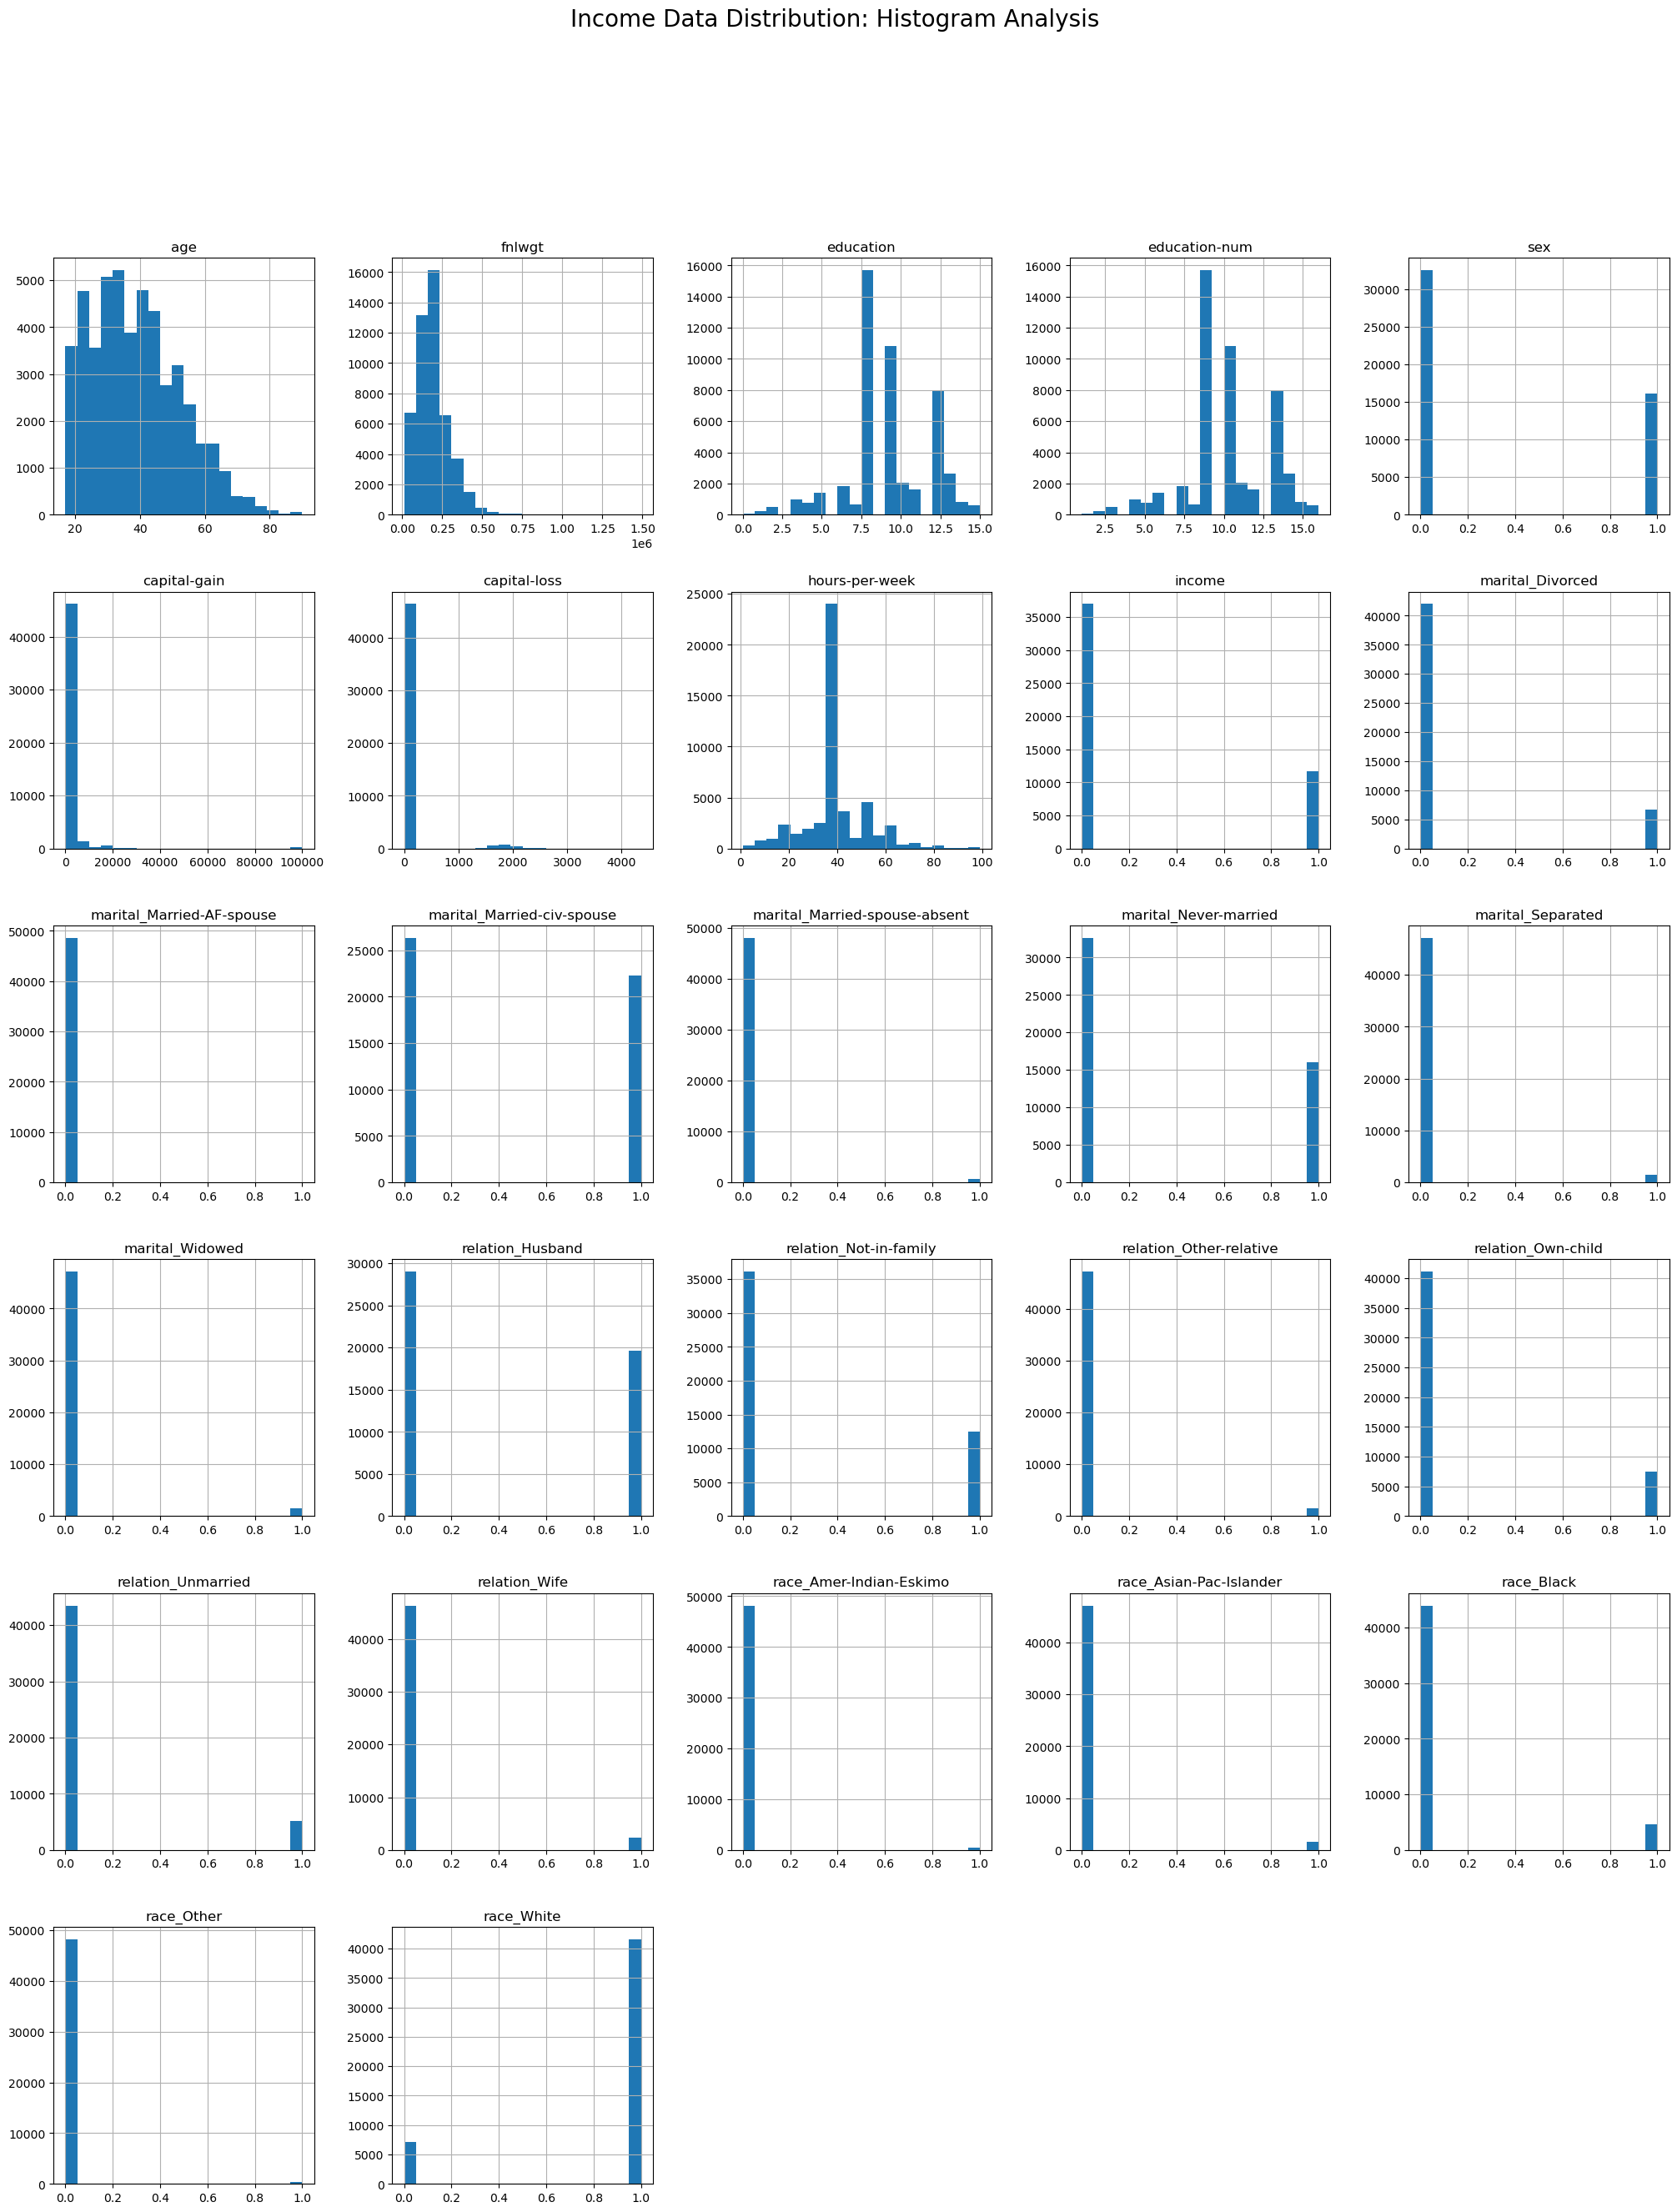

In [83]:
import matplotlib.pyplot as plt
df.hist(bins=20,figsize=(25,30))
plt.suptitle('Income Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

In [84]:
#Calculate skewness for each column
skewness=df.skew()
#sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)
#Display the sorted skewness values
print(sorted_skewness)

race_White                       -2.012486
education                        -0.313920
education-num                    -0.313920
marital_Married-civ-spouse        0.167614
hours-per-week                    0.239904
relation_Husband                  0.393255
age                               0.555919
sex                               0.714337
marital_Never-married             0.726880
relation_Not-in-family            1.109197
income                            1.220056
fnlwgt                            1.440969
relation_Own-child                1.908201
marital_Divorced                  2.120775
relation_Unmarried                2.572558
race_Black                        2.739029
relation_Wife                     4.235079
capital-loss                      4.559032
marital_Separated                 5.370836
marital_Widowed                   5.392232
race_Asian-Pac-Islander           5.398107
relation_Other-relative           5.415832
marital_Married-spouse-absent     8.636748
race_Amer-I

In [85]:
df['age']=np.log1p(df['age'])

<Axes: >

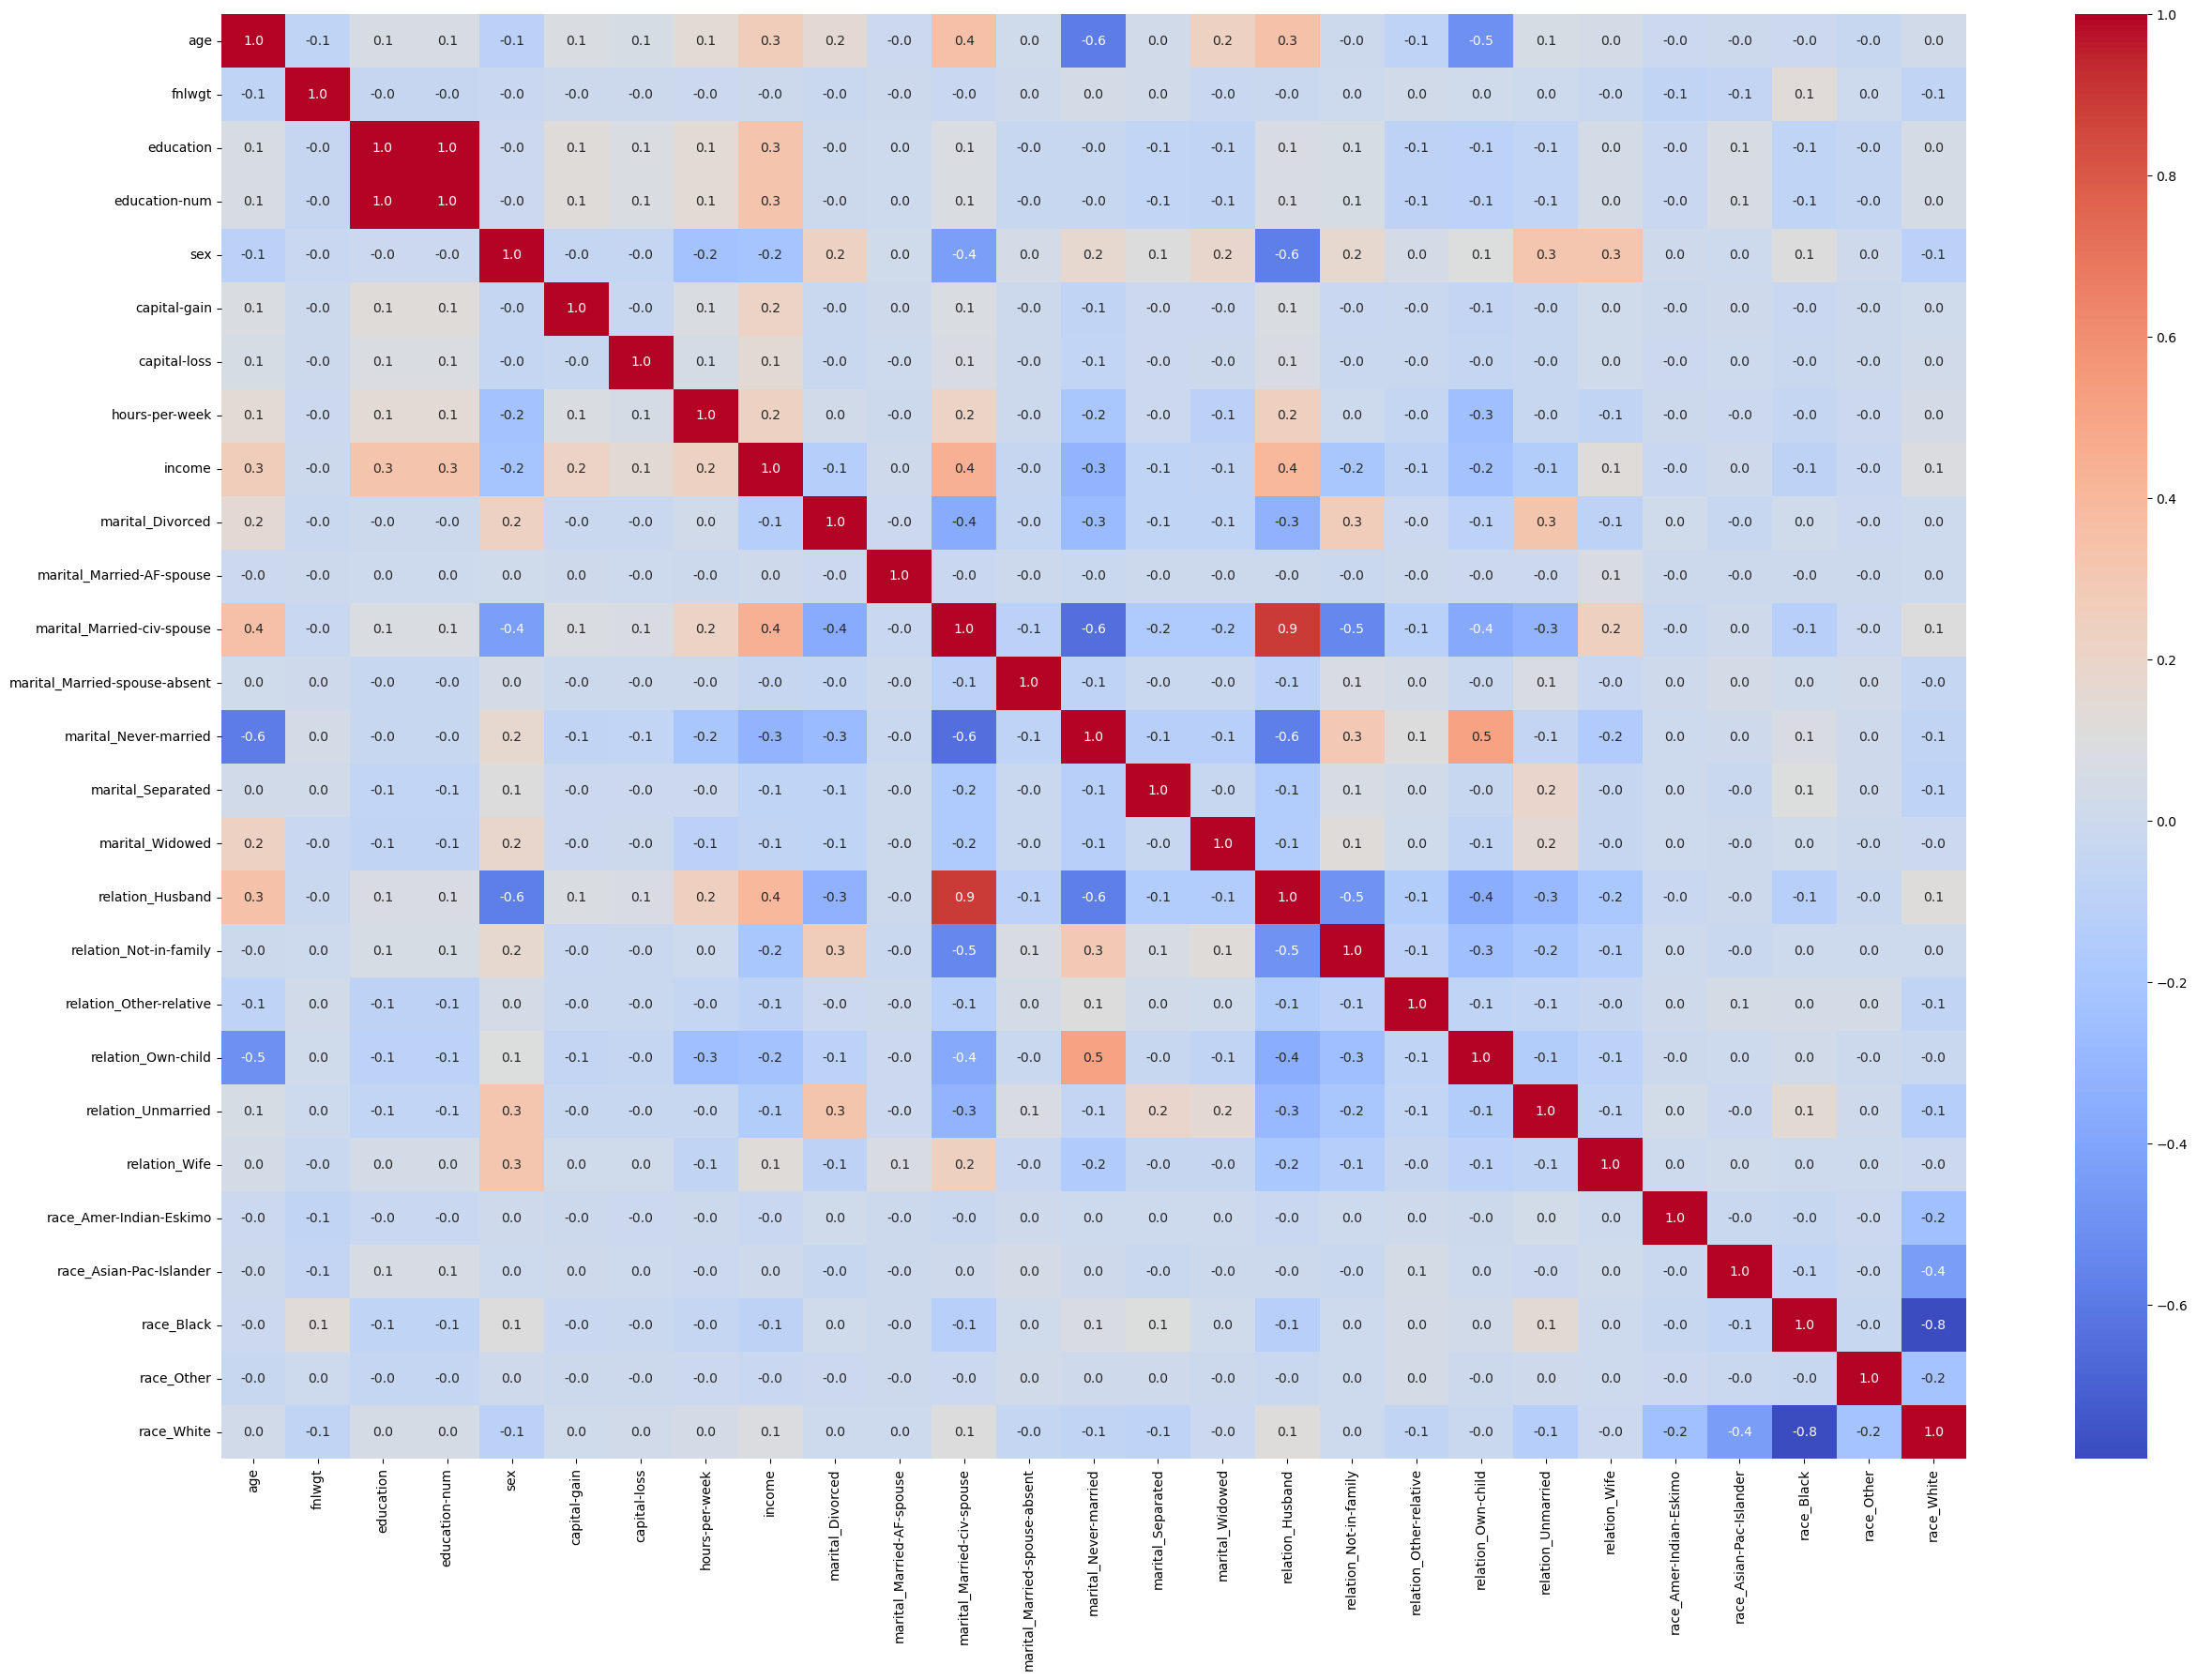

In [86]:
import seaborn as sns
plt.figure(figsize=(30,20))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)

In [87]:
correlation_matrix=df.corr()
#set the correlation threshold
threshold=0.5
#find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    #check if the absolute correlation exceeds the threshold
    if abs (correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
#print all pairs of highly correlated features
print(highly_correlated_pairs)

[('education-num', 'education'), ('marital_Never-married', 'age'), ('marital_Never-married', 'marital_Married-civ-spouse'), ('relation_Husband', 'sex'), ('relation_Husband', 'marital_Married-civ-spouse'), ('relation_Husband', 'marital_Never-married'), ('relation_Not-in-family', 'marital_Married-civ-spouse'), ('relation_Own-child', 'marital_Never-married'), ('race_White', 'race_Black')]


In [88]:
df=df.drop(['education-num',
        'fnlwgt',
        'marital_Divorced',
        'marital_Married-AF-spouse',
        "marital_Married-spouse-absent",
        'marital_Married-civ-spouse',
        'marital_Separated',
        'marital_Widowed',
        'relation_Husband',
        'relation_Not-in-family',
        'relation_Other-relative',
        'relation_Own-child',
        'relation_Unmarried',
        'relation_Wife',
        'race_Amer-Indian-Eskimo',
        'race_Asian-Pac-Islander',
        'race_Black',
        'race_Other',
        'race_White'
],axis=1)


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48640 entries, 0 to 48841
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    48640 non-null  float64
 1   education              48640 non-null  int64  
 2   sex                    48640 non-null  int64  
 3   capital-gain           48640 non-null  int64  
 4   capital-loss           48640 non-null  int64  
 5   hours-per-week         48640 non-null  int64  
 6   income                 48640 non-null  int64  
 7   marital_Never-married  48640 non-null  int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 3.2 MB


In [90]:
df

,age,education,sex,capital-gain,capital-loss,hours-per-week,income,marital_Never-married
0,3.258097,6,0,0,0,40,0,1
1,3.663562,8,0,0,0,50,0,0
2,3.367296,11,0,0,0,40,1,0
3,3.806662,9,0,7688,0,40,1,0
4,2.944439,9,1,0,0,30,0,1
...,...,...,...,...,...,...,...,...
48837,3.332205,11,1,0,0,38,0,0
48838,3.713572,8,0,0,0,40,1,0
48839,4.077537,8,1,0,0,40,0,0
48840,3.135494,8,0,0,0,20,0,1


In [91]:
from sklearn.preprocessing import StandardScaler
df_standardized = df.copy()
# Select columns to scale
num_cols_to_standardize = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = StandardScaler()
df_standardized[num_cols_to_standardize] = scaler.fit_transform(df_standardized[num_cols_to_standardize])

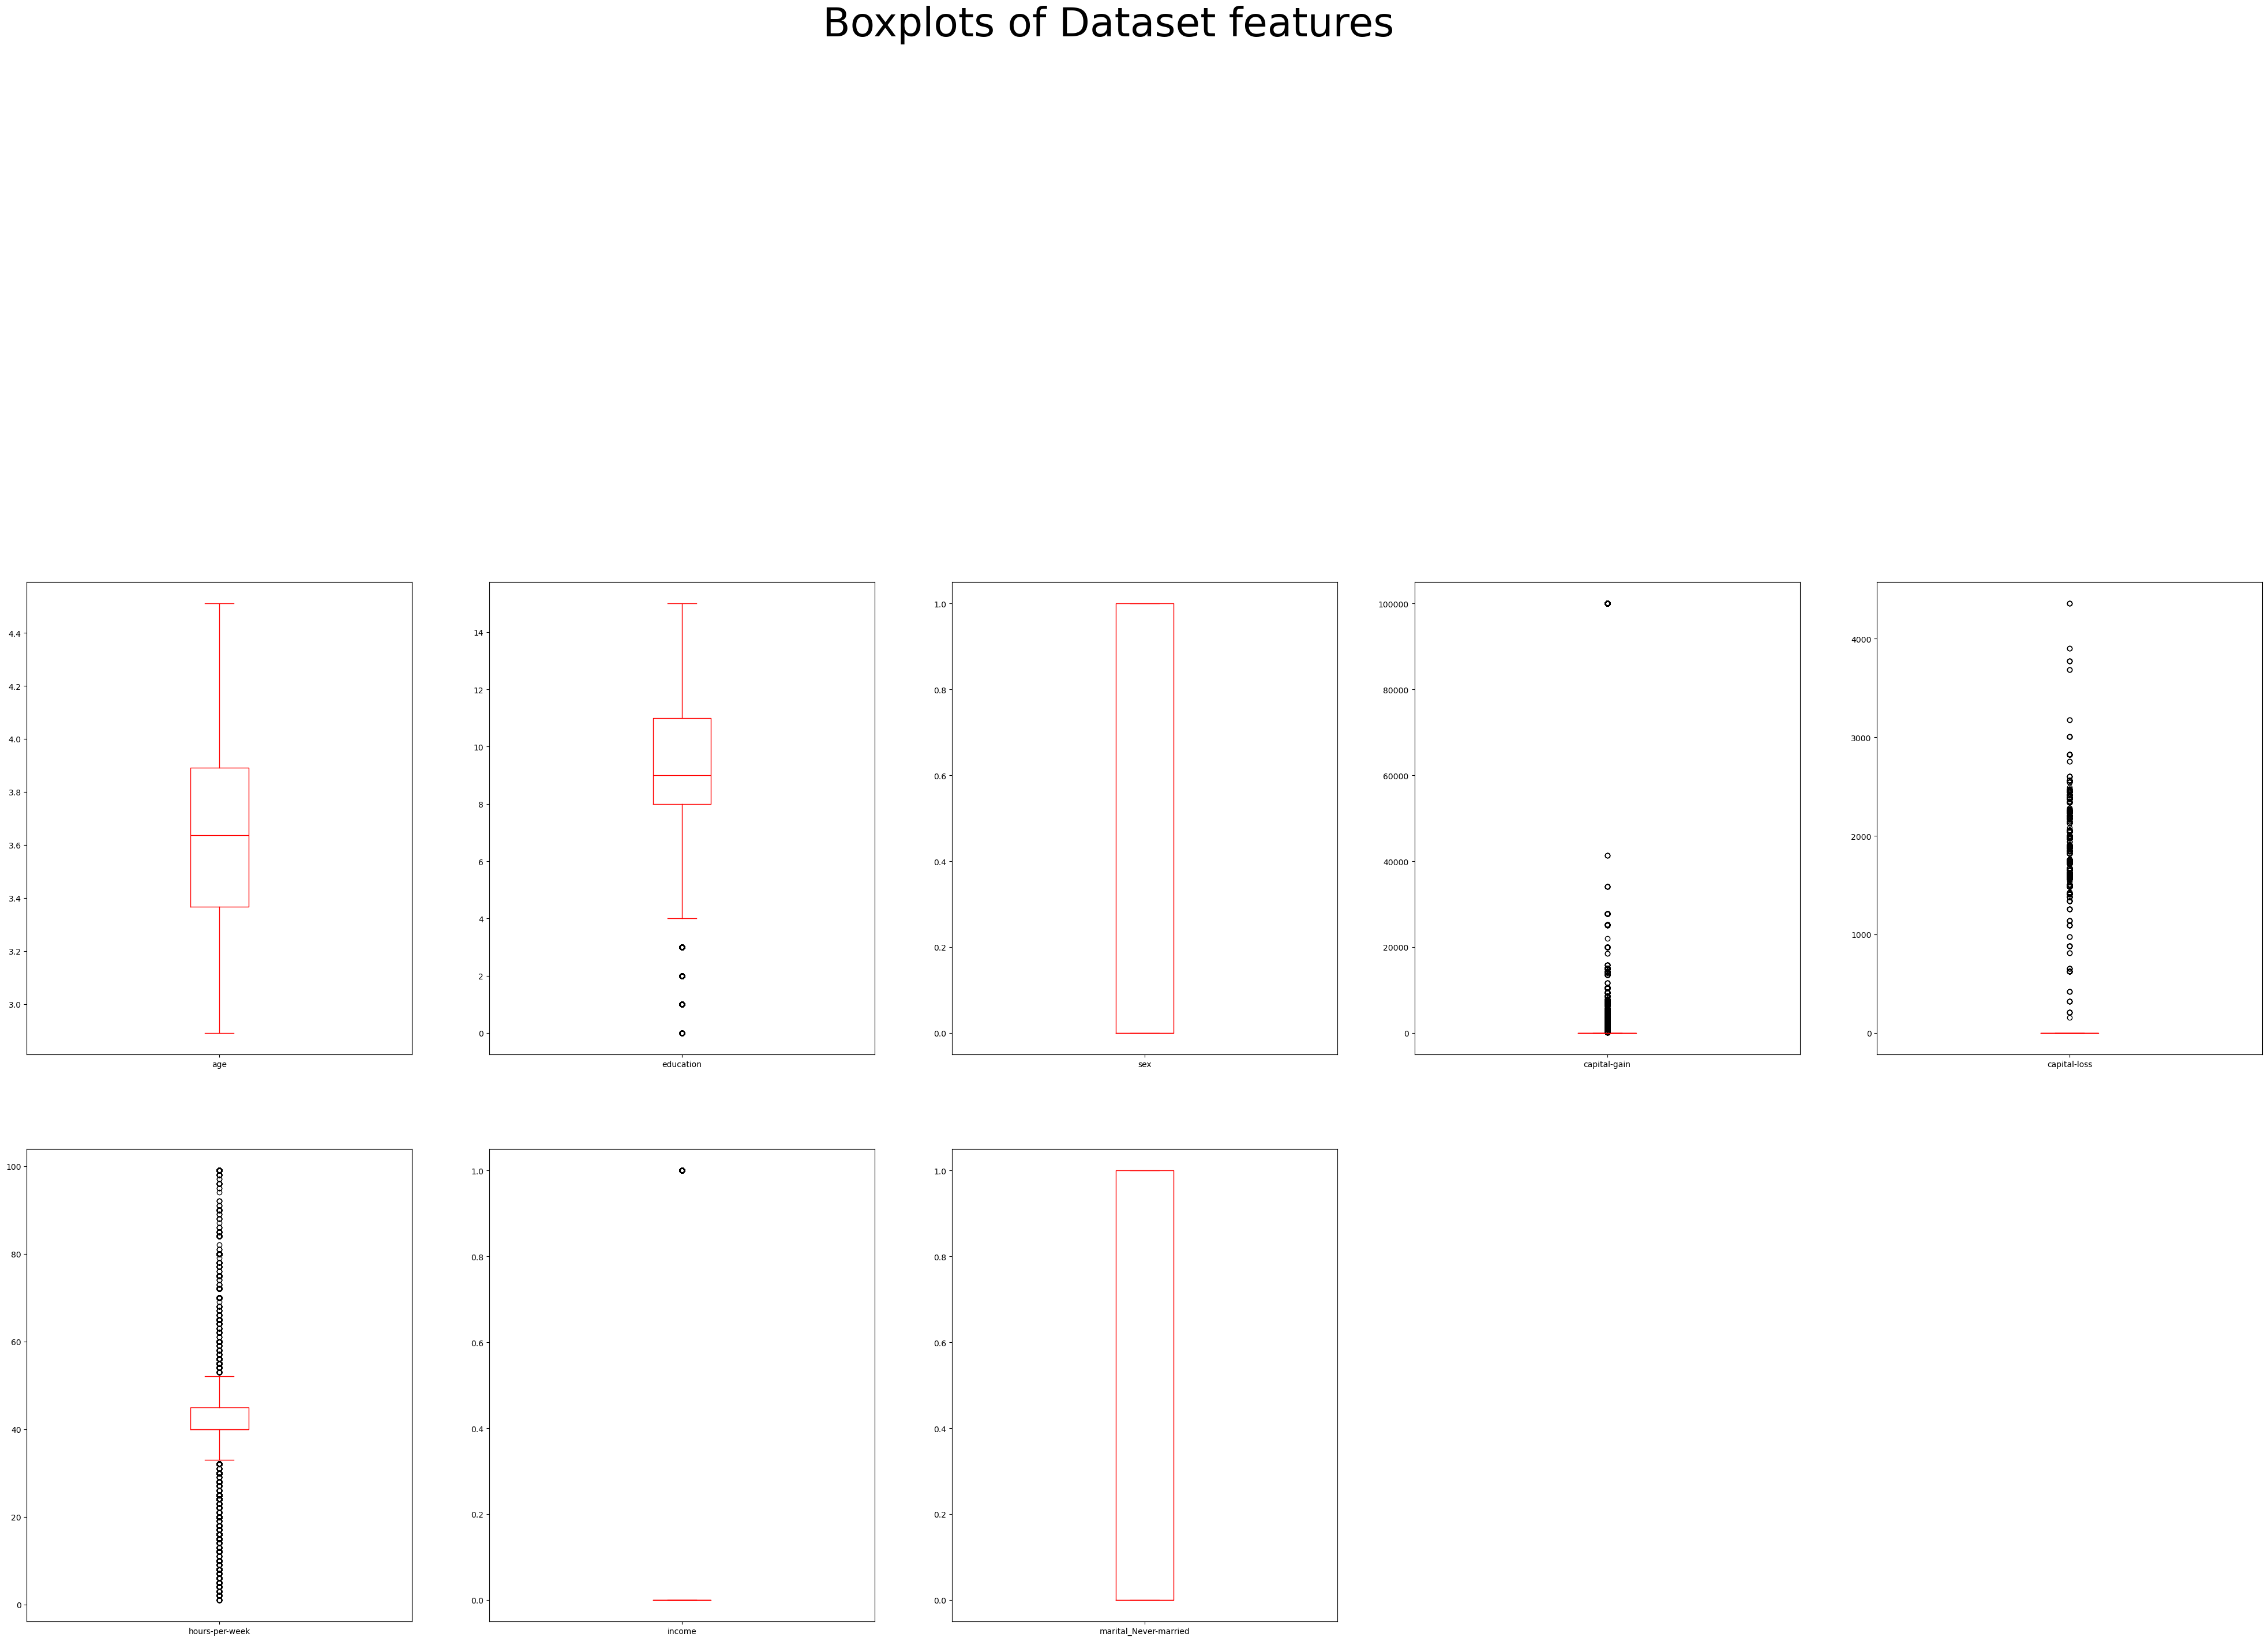

In [92]:
df.plot(kind='box',subplots=True, layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset features',fontsize=50)
plt.show()

In [93]:
#create a copy of the original data for comparison
df_copy = df.copy()

def remove_outliers_iqr( df,exclude_columns):

  #loop through numeric columns
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue #skip excluded columns
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    #define outlier bounds
    lower_bound= Q1-1.5* IQR
    upper_bound= Q3 + 1.5 * IQR
    #filter out the outliers
    df=df[(df[column]>=lower_bound)&(df[column]<=upper_bound)]
  return df

#definethe columns to exclude
exclude_columns=['income']

#removing outliers
df=remove_outliers_iqr(df,exclude_columns)

#print shapes of data before and after removing outliers
print("shape of data before removing outliers:",df_copy.shape)
print("shape of data before removing outliers:",df.shape)
print("number of outliers removed :", df_copy.shape[0]-df.shape[0])

shape of data before removing outliers: (48640, 8)
shape of data before removing outliers: (29347, 8)
number of outliers removed : 19293


MODEL TRAINING AND EVALUATION

In [94]:
x=df.drop('income',axis=1)
y=df[['income']]

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print('Shape of traiining features :',x_train.shape)
print('Shape of traiining features :',x_test.shape)
print('Shape of traiining features :',y_train.shape)
print('Shape of traiining features :',y_test.shape)

Shape of traiining features : (23477, 7)
Shape of traiining features : (5870, 7)
Shape of traiining features : (23477, 1)
Shape of traiining features : (5870, 1)


In [96]:
#
#Machine Learning Algorithms- classifications
#
from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier #K-Nearest neighbors classifier
from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier #random vector classifier
from sklearn.naive_bayes import GaussianNB #naive  bayes classifier
from sklearn.tree import DecisionTreeClassifier #desicion tree classifier
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier #extra trees classifier
from sklearn.linear_model import SGDClassifier #stochastic Gradient Descent classifier


In [97]:
from sklearn.metrics import accuracy_score #evaluates model accuracy
from sklearn.metrics import confusion_matrix #computes confusion matrix
from sklearn.metrics import classification_report #precision ,recall,F1-score summary
from sklearn.metrics import precision_score #precision metric
from sklearn.metrics import roc_auc_score #AUC-ROC score for evaluating classifiers
from sklearn import metrics # collection of evaluation metrics
from sklearn.metrics import mean_squared_error

In [98]:
clas_models={'ir':LogisticRegression(max_iter=500),
'rfc':RandomForestClassifier(),
'dtc':DecisionTreeClassifier(),
'knn':KNeighborsClassifier(n_neighbors=11),
'svm':SVC(kernel='linear'),
'gbc':GradientBoostingClassifier(random_state=0,learning_rate=0.45),
'etc':ExtraTreesClassifier(),
'nb':GaussianNB()}

In [99]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}
for model_name,model in clas_models.items():
    #Train the model
    model.fit(x_train,y_train)
    model_pred=model.predict(x_test)

    #Calculate metrics
    accuracy=accuracy_score(y_test,model_pred)
    precision=precision_score(y_test,model_pred)
    recall=recall_score(y_test,model_pred)
    f1=f1_score(y_test,model_pred)

    #Store results in the dictionary
    results['Model'].append(model)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
#convert results to a dataframe
results_df=pd.DataFrame(results)

#display the results in a table
results_df

c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

,Model,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression(max_iter=500),0.820102,0.618978,0.347826,0.445378
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.805281,0.545131,0.376538,0.445415
2,DecisionTreeClassifier(),0.804089,0.546939,0.329779,0.411464
3,KNeighborsClassifier(n_neighbors=11),0.806133,0.548972,0.372436,0.443793
4,SVC(kernel='linear'),0.821295,0.627246,0.343724,0.444091
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.822658,0.620270,0.376538,0.468606
6,"(ExtraTreeClassifier(random_state=106165689), ...",0.805451,0.552097,0.334701,0.416752
7,GaussianNB(),0.775298,0.471751,0.684988,0.558715


In [100]:
x2s=df_standardized.drop('income',axis=1)
y2s=df_standardized[['income']]
x2s_train,x2s_test,y2s_train,y2s_test=train_test_split(x2s,y2s,random_state=42,test_size=0.2)
results={'Model':[],'Accuracy':[],'Precision':[],'Recall':[],'F1-Score':[]}

for model_name,model in clas_models.items():
    #Train the model
    model.fit(x2s_train,y2s_train)
    model_pred2s=model.predict(x2s_test)

    accuracy2=accuracy_score(y2s_test,model_pred2s)
    precision2=precision_score(y2s_test,model_pred2s)
    recall2=recall_score(y2s_test,model_pred2s)
    f12=f1_score(y2s_test,model_pred2s)

    #Store results in the dictionary
    results['Model'].append(model)
    results['Accuracy'].append(accuracy2)
    results['Precision'].append(precision2)
    results['Recall'].append(recall2)
    results['F1-Score'].append(f12)

#convert results to a dataframe
results_df2=pd.DataFrame(results)
#sort by accuracy
results_df2=results_df2.sort_values(by='Accuracy',ascending=False)

#display the sorted DataFrame with background gradient
results_df2.style.background_gradient('Blues')


c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Pc\anaconda\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

,Model,Accuracy,Precision,Recall,F1-Score
5,"GradientBoostingClassifier(learning_rate=0.45, random_state=0)",0.855880,0.779430,0.546007,0.642164
1,RandomForestClassifier(),0.834396,0.693467,0.539062,0.606593
0,LogisticRegression(max_iter=500),0.834087,0.716437,0.495660,0.585942
3,KNeighborsClassifier(n_neighbors=11),0.833368,0.690889,0.536458,0.603958
4,SVC(kernel='linear'),0.831928,0.755930,0.428819,0.547217
6,ExtraTreesClassifier(),0.830387,0.688147,0.519097,0.591786
2,DecisionTreeClassifier(),0.823705,0.661902,0.522569,0.584041
7,GaussianNB(),0.802734,0.688172,0.305556,0.423204


In [101]:
import pickle
#save the classification model
c_model=GradientBoostingClassifier(random_state=0,learning_rate=0.45)
c_model.fit(x2s_train,y2s_train.values.ravel())
with open("classification_model.pkl","wb")as file:
   pickle.dump(c_model,file)

In [102]:
with open('Scaler.pkl','wb') as file:
  pickle.dump(scaler,file)

In [103]:
import sklearn
print(sklearn.__version__)


1.4.2
